In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Open dataframes

In [2]:
def plot_ts(df, collabel, title, take_pct_chg=False):
    x = np.arange(0, len(df), 1)
    xlabel = np.arange(0, len(df), 15)
    # print(df['Perioden'].iloc[x])

    fig, ax = plt.subplots(1,1, figsize=(10,4))
    ts = df[collabel]
    if take_pct_chg:
        ts = 100 * ts.pct_change()
    ax.plot(x, ts)
    ax.set_xticks(xlabel)
    ax.set_xticklabels(df['Perioden'].iloc[xlabel])
    ax.set_title(title)
    ax.set_ylabel('growth rate (%)')
    ax.set_xlabel('time')
    plt.show()


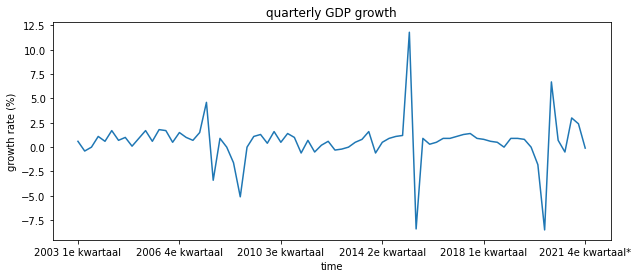

In [3]:
# GDP

df_gdp = pd.read_csv('statistics_CBS/Bbp__kwartalen__mutaties_25072022_134510.csv', delimiter=';')
plot_ts(df_gdp, 'Opbouw bbp vanuit de finale bestedingen/Finale bestedingen/Totaal (%)', 'quarterly GDP growth')

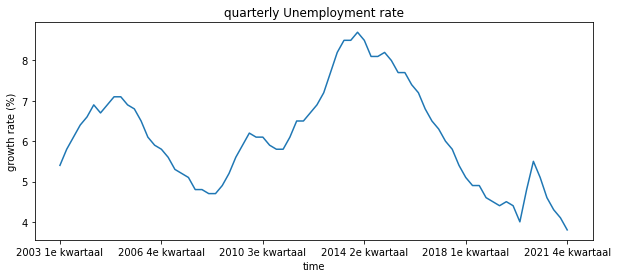

In [4]:
df_U = pd.read_csv('statistics_CBS/Arbeidsdeelname_per_maand__05072022_141822.csv', delimiter=';')
plot_ts(df_U, 'Werkloosheidspercentage/Seizoengecorrigeerd (%)', 'quarterly Unemployment rate')

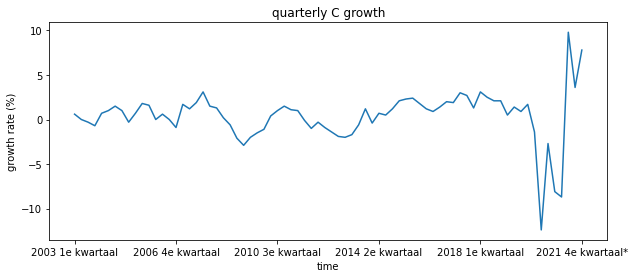

In [5]:
df_C = pd.read_csv('statistics_CBS/Consumptieve_bestedingen_van_huishoudens_25072022_135844.csv', delimiter=';')
plot_ts(df_C, 'Volume/Volumemutaties (%)', 'quarterly C growth')

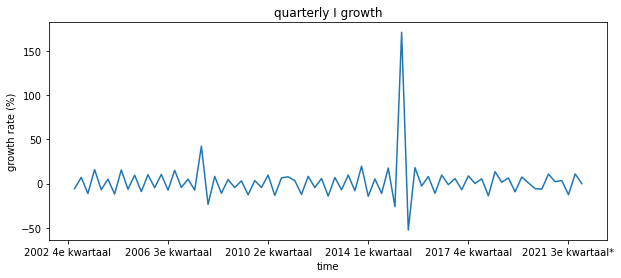

In [6]:
df_I = pd.read_csv('statistics_CBS/Bbp__kwartalen__waarden_25072022_143750.csv', delimiter=';')
title = 'Aanvullende detailgegevens/Bruto investeringen in vaste activa/Bruto investeringen naar bestemming/Totaal (mln euro)'
plot_ts(df_I, title, 'quarterly I growth', take_pct_chg=True)

## Merge time series

In [7]:
dGDP = df_gdp['Opbouw bbp vanuit de finale bestedingen/Finale bestedingen/Totaal (%)'].to_numpy()[:-8]
U = df_U['Werkloosheidspercentage/Seizoengecorrigeerd (%)'].to_numpy()[:-8]
dC = df_C['Volume/Volumemutaties (%)'].to_numpy()[:-8]
dI = 100 * df_I['Aanvullende detailgegevens/Bruto investeringen in vaste activa/Bruto investeringen naar bestemming/Totaal (mln euro)'].pct_change().to_numpy()[1:-9]

In [8]:
all_data = {
    'dGDP': dGDP,
    'U': U,
    'dC': dC,
    'dI': dI
}
df = pd.DataFrame(all_data)
df.head()

,dGDP,U,dC,dI
0,0.6,5.4,0.6,-5.908203
1,-0.4,5.8,0.0,6.967653
2,0.0,6.1,-0.3,-11.294026
3,1.1,6.4,-0.7,15.776425
4,0.6,6.6,0.7,-7.051080


In [29]:
print((1 + df.dGDP.mean()/100) ** 4 - 1)

print(df.dC.mean())
print(df.dI.mean())

print('U mean:', df.U.mean())
print('U std:', df.U.std())

0.024935719041326188
0.6411764705882353
2.4325000000000006
U mean: 6.28235294117647
U std: 1.174218212636281


In [35]:
df.round(2)
df.agg(
    {
        'dGDP': ['mean', 'std', 'skew', 'kurtosis', 'min', 'max', 'count'],
        'U': ['mean', 'std', 'skew', 'kurtosis', 'min', 'max', 'count'],
        'dC': ['mean', 'std', 'skew', 'kurtosis', 'min', 'max', 'count'],
        'dI': ['mean', 'std', 'skew', 'kurtosis', 'min', 'max', 'count']
    }
).round(2)

,dGDP,U,dC,dI
mean,0.62,6.28,0.64,2.43
std,2.11,1.17,1.40,24.54
skew,0.76,0.29,-0.47,4.82
kurtosis,16.46,-0.76,-0.37,33.97
min,-8.40,4.40,-2.90,-52.51
max,11.80,8.70,3.10,171.19
count,68.00,68.00,68.00,68.00


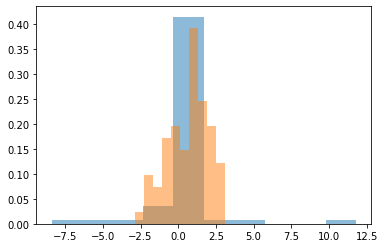

In [35]:
plt.hist(df.dGDP, alpha=0.5, density=True)
# plt.hist(df.dI, alpha=0.5)
plt.hist(df.dC, alpha=0.5, density=True)
plt.show()